<h1><center> Math761 - Midterm <br>

## Mihir Kotecha
### 10/20/2024

<h1> Question 1  

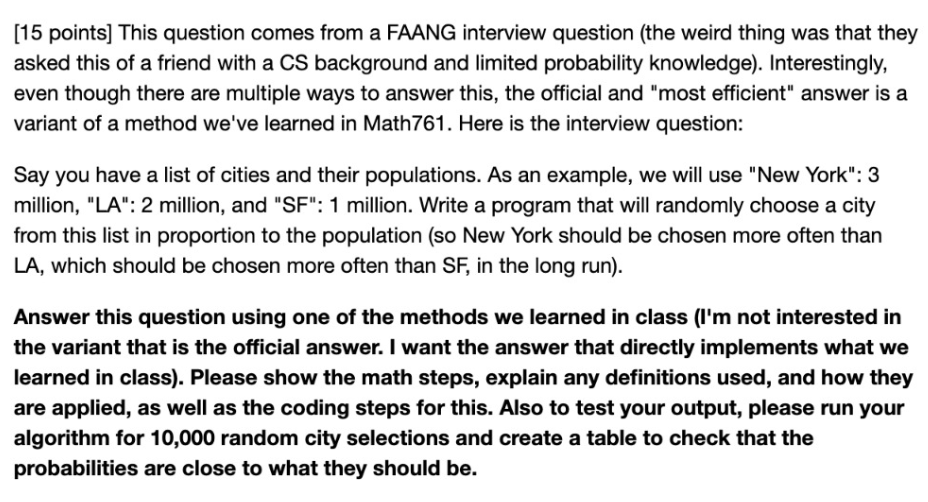

The method that I have implemented is the inverse transformation method, I have included a further explanation and math in the PDF attached with this notebook file.

In [11]:
# Defining the populations
cities <- c("New York", "LA", "SF")
populations <- c(3, 2, 1) # millions

# Converting the populations to weighted probabilities
actual_probabilities <- populations / sum(populations)

# Creating a function to randomly select a city using inverse transformation
select_city <- function() {
  U <- runif(1) # Generating a uniform RV
  if (U <= actual_probabilities[1]) {
    return("New York")
  } else if (U <= sum(actual_probabilities[1:2])) {
    return("LA")
  } else {
    return("SF")
  }
}

# Simulating 10000 city selections
set.seed(1) # As per the question
n <- 10000
selections <- replicate(n, select_city())

# Creating a table of the simulated probabilities
simulated_probabilities <- table(selections) / n

# Creating a comparison table between actual and the simulated probabilities
comparison_table <- data.frame(
  City = cities,
  Actual_Probability = actual_probabilities,
  Simulated_Probability = as.numeric(simulated_probabilities[cities])
)

print(comparison_table)

      City Actual_Probability Simulated_Probability
1 New York          0.5000000                0.5047
2       LA          0.3333333                0.3219
3       SF          0.1666667                0.1734


<h1> Question 2

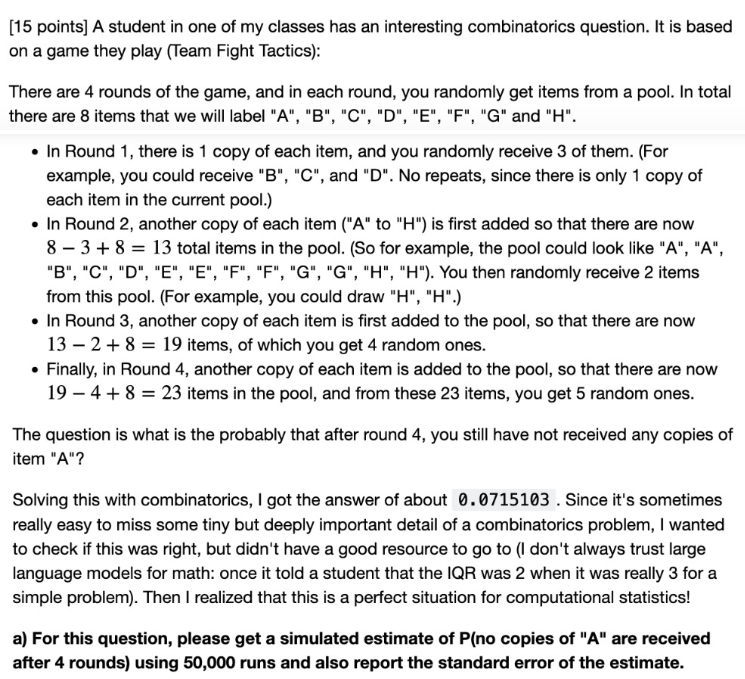

In [16]:
# Setting seed as per the instructions
set.seed(1)

# Specifying the number of simulations
n_simulations <- 50000

# Creating the function to simulate one game
simulate_game <- function() {
  # Round 1: 8 items, draw 3
  pool_round_1 <- c("A", "B", "C", "D", "E", "F", "G", "H")
  draw_1 <- sample(pool_round_1, 3, replace = FALSE)

  # Round 2: 13 items, 2 copies of each except what was drawn in round 1, draw 2
  pool_round_2 <- rep(pool_round_1, 2)
  draw_2 <- sample(pool_round_2, 2, replace = FALSE)

  # Round 3: 19 items, 3 copies of each except what was drawn in round 2, draw 4
  pool_round_3 <- rep(pool_round_1, 3)
  draw_3 <- sample(pool_round_3, 4, replace = FALSE)

  # Round 4: 23 items, 4 copies of each except what was drawn in round 3, draw 5
  pool_round_4 <- rep(pool_round_1, 4)
  draw_4 <- sample(pool_round_4, 5, replace = FALSE)

  # Combining all of the draws
  total_draws <- c(draw_1, draw_2, draw_3, draw_4)

  # Returning TRUE if "A" was never drawn, since we wish to find out the probability of A not being drawn
  return(!"A" %in% total_draws)
}

# Running the simulation 50000 times over
no_A_results <- replicate(n_simulations, simulate_game())

# Estimating the probability
estimated_probability <- mean(no_A_results)

# Calculating the standard error
standard_error <- sqrt(estimated_probability * (1 - estimated_probability) / n_simulations)

# Display the results
cat("Estimated Probability of not receiving 'A' after 4 rounds:", estimated_probability, "\n")
cat("Standard Error of the estimate:", standard_error, "\n")

Estimated Probability of not receiving 'A' after 4 rounds: 0.12816 
Standard Error of the estimate: 0.001494891 


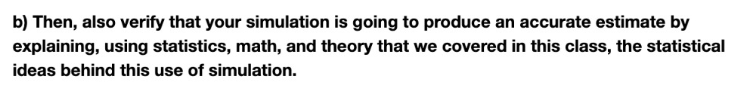

First, considering the Law of Large Numbers (LLN), it guarantees that as we increase the number of simulations, the average of the results will converge to the true probability, in this case, the probability of not receiving an "A" even after four rounds. If $\hat{p}_n$ is our estimate after 50000 simulations, we can be fairly confident that the estimate will be close to the actual probability, as LLN implies that the estimate becomes more and more accurate with a higher n, therefore :  
$\lim_{n \to \infty}$ $\hat{p}_n$ = p


The method we are using in this question is the Monte Carlo simulation, which is the preferred method for estimating the probability and expectation in a complex scenario when the solution is difficult to calculate. By running this simulation 50000 times, we are using the emperical results from the random sampling to estimate the probability. And Monte Carlo relies on random sampling and probabilistic reasoning, which works out in terms of the random nature of the game in our problem.


According to the Central Limit Theorem, which also ties into the Law of Large Numbers, when running a large number of simulations, the distribution of the estimated probability will eventually be approximated as a normal distribution. We can calculate the standard error to quantify the uncertainity, therefore giving a confidence interval to understand the precision, the Standard Error (SE) is calculated as follows :

SE = $\sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{n}}$ \

The $\hat{p}_n$ I calculated was : 0.12816

The SE that I calculated was : 0.001494891, which implies that the variability in the probability calculated is low, which supports my idea that the simulation is accurate.


Also the final point I would make about the results being accurate is that using the sample() function ensures here that the samples are being chosen randomly and without bias, which mimicks the real-world scenario that is defined in the question. There is also the assumption of independence that ensures that the model here is valid.

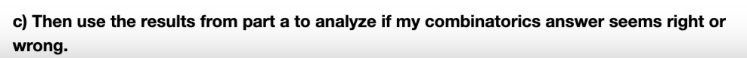

The Combinatorics result : P(no A) = 0.0715103

The Simulation result : $\hat{p}_n$(no A) = 0.12816

On first impressions, the simulation result (0.12816) I got is comparably quite higher than the combinatorics result (0.0715103). Since the simulation answer is based off of randomly drawing items from the pool and repeating it 50000 times over, it provides a more reliable emperical estimate of the probability, the smaller standard error further supports the accuracy, which indicates that the true probability is closer to 0.12816.


The differences in the results could come from one of two possible reasons: first, the combinatorics solution may have possibly made an incorrect assumption regarding the drawing process or even the size of the pool after each round, or it could be the fact that the simulation can take into account all of the randomness that is involved with the draws, whereas combinatorics can simplify the problem which misses out on the aspect of the randomness.


Based on this, I will conclude that the combinatorics solution seems to be wrong, seeing that it is providing a much smaller probability and the fact that the standard error calculated in the simulation is a small margin of error and the simulation being backed by statistical reasoning.

<h1> Question 3

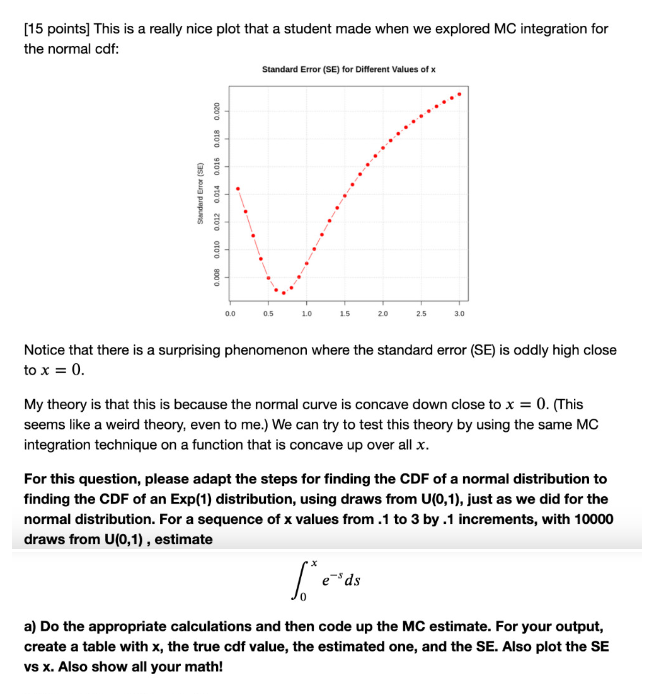

     x   True_CDF MC_Estimate Standard_Error
1  0.1 0.09516258   0.9516163   0.0002769052
2  0.2 0.18126925   0.9063118   0.0005231536
3  0.3 0.25918178   0.8649910   0.0007445804
4  0.4 0.32967995   0.8238159   0.0009463313
5  0.5 0.39346934   0.7853266   0.0011356985
6  0.6 0.45118836   0.7521181   0.0013147807
7  0.7 0.50341470   0.7188170   0.0014478131
8  0.8 0.55067104   0.6891693   0.0015938937
9  0.9 0.59343034   0.6611084   0.0017148882
10 1.0 0.63212056   0.6337491   0.0018121240
11 1.1 0.66712892   0.6088960   0.0019067585
12 1.2 0.69880579   0.5821349   0.0019823051
13 1.3 0.72746821   0.5594116   0.0020715030
14 1.4 0.75340304   0.5393552   0.0021310969
15 1.5 0.77686984   0.5166628   0.0022155166
16 1.6 0.79810348   0.4992819   0.0022637180
17 1.7 0.81731648   0.4851002   0.0023176693
18 1.8 0.83470111   0.4626909   0.0023448248
19 1.9 0.85043138   0.4421943   0.0023877740
20 2.0 0.86466472   0.4302574   0.0024049866
21 2.1 0.87754357   0.4203133   0.0024465387
22 2.2 0.8

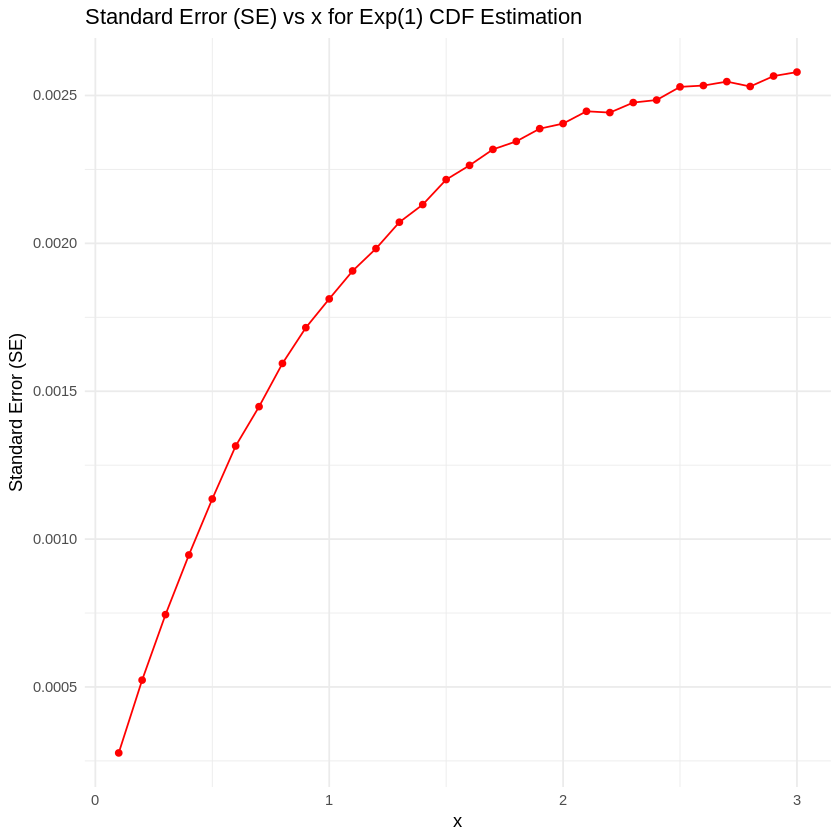

In [20]:
set.seed(1)

# Setting up the x values from 0.1 to 3 increasing by 0.1
x_values <- seq(0.1, 3, by = 0.1)

# Defining the number of simulations
n_simulations <- 10000

# Calculating the true CDF values for Exp(1) distribution; Math shown in the PDF file
true_cdf <- function(x) {
  1 - exp(-x)
}

# Creating a function to estimate the CDF using Monte Carlo integration
mc_estimate_cdf <- function(x, n_simulations) {
  U <- runif(n_simulations)
  estimates <- exp(-U * x)
  mean_estimate <- mean(estimates)
  se_estimate <- sd(estimates) / sqrt(n_simulations)
  return(c(mean_estimate, se_estimate))
}

# Initializing a vector to store results for MC estimators, SE values and the true CDF value
mc_estimates <- numeric(length(x_values))
se_estimates <- numeric(length(x_values))
true_values <- true_cdf(x_values)

# Running a for loop to calculate the Monte Carlo integral and SE value for each x value
for (i in 1:length(x_values)) {
  result <- mc_estimate_cdf(x_values[i], n_simulations)
  mc_estimates[i] <- result[1]
  se_estimates[i] <- result[2]
}

# Creating a table with x, true CDF, estimated CDF, and standard error to compare the results
results_table <- data.frame(
  x = x_values,
  True_CDF = true_values,
  MC_Estimate = mc_estimates,
  Standard_Error = se_estimates
)

print(results_table)

# Plotting the standard error vs x as asked in the question
library(ggplot2)
ggplot(results_table, aes(x = x, y = Standard_Error)) +
  geom_line(color = "red") +
  geom_point(color = "red") +
  labs(title = "Standard Error (SE) vs x for Exp(1) CDF Estimation",
       x = "x",
       y = "Standard Error (SE)") +
  theme_minimal()

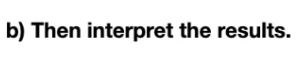

From the plot here, we can see that the standard error is increasing as the x increases. This is makes sense as the x grows, the function $e^{-s}$ becomes flatter, making the differences in the samples smaller and creating variability in the estimates for larger x values. On the other hand, we can see a lower SE value for smaller x values, for which the exponential decay is steeper and therefore, the integration result is more precise.


Now, looking at the table to compare the true CDF value against the estimated values, we can see that as the x increases, the Monte Carlo estimate starts deviating more from the true CDF and for smaller values of x, the estimate is very close to the true CDF value. For example, at x = 0.1, we calculated the true CDF = 0.0952 and the MC estimate = 0.09516, with a SE of 0.00028, which indicates that it is a very accurate estimation. But on the other hand, taking x = 3.0, the true CDF = 0.9502 and the MC estimate = 0.31965 with a SE of 0.00258, which indicates that there is a huge underestimation.


To conclude, the Monte Carlo method provides very accurate estimates for smaller values of x, indicated by the low SEs and the estimated CDF matching closely with the true CDF. But for larger values of x, it starts to become unreliable with higher error and underestimating the true CDF. Therefore, while MC integration is useful, alternative methods would be preferable to handle integrals over slow decaying functions, such as this one using an exponential distribution over a large x value.

<h1> Question 4

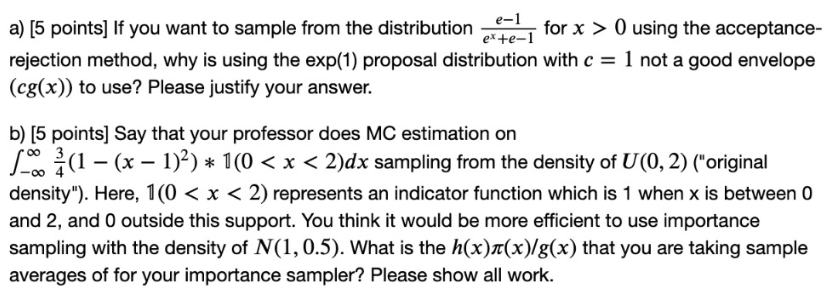

Answer in the PDF file I have attached with this notebook file. (Also don't wish to use LaTeX anymore)

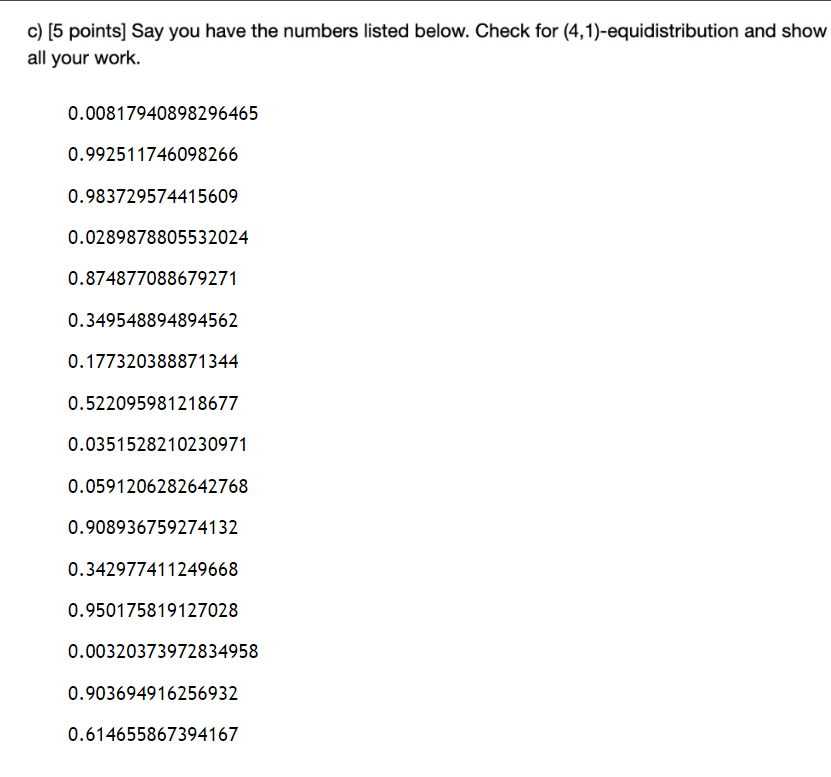

We are asked to check for (4,1)-equidistribution in this question. It means that when the numbers are divided into blocks of 4 numbers, each of them should cover space between 0 and 1 evenly.

First, we will divide the sequence of numbers into groups of 4. Since there's 16 numbers, we get 4 groups :

Group 1 : {0.008179,0.992511,0.983729,0.028987}

Group 2 : {0.874877,0.349549,0.177320,0.522096}

Group 3 : {0.035152,0.059121,0.908937,0.342977}

Group 4 : {0.950176,0.003203,0.903694,0.614656}

We will now sort the groups of number so we can check if they cover the groups evenly

Group 1 : {0.008179,0.028987,0.983729,0.992511}

Group 2 : {0.177320,0.349549,0.522096,0.874877}

Group 3 : {0.035152,0.059121,0.342977,0.908937}

Group 4 : {0.003203,0.614656,0.903694,0.950176}

We will now check the spread between the numbers inside all of the groups :

Group 1 :

0.028987−0.008179=0.020808

0.983729−0.028987=0.954742

0.992511−0.983729=0.008782

There is a large gap between 0.028987 and 0.983729, which means that this group is not spread evenly.

Group 2 :

0.349549−0.177320=0.172229,

0.522096−0.349549=0.172547,

0.874877−0.522096=0.352781

While this group is a little more evenly spaced, it is still uneven.

Group 3 :

0.059121−0.035152=0.023969

0.342977−0.059121=0.283856

0.908937−0.342977=0.565960

Similar to group 1, there is a large gap between 0.342977 and 0.908937, which means that this group is not spread evenly.

Group 4 :

0.614656−0.003203=0.611453

0.903694−0.614656=0.289038

0.950176−0.903694=0.046482

There is again a very large gap between 0.003203 and 0.614656, which means that it is not evenly spread.

Based on the differences between these groups, we can conclude that these numbers do are not (4,1)-equidistributed. They do not cover the [0,1] interval evenly and the gaps suggest that they are non-uniform distribution within these 4 groups.